In [1]:
#To run this program you need the 'MortalKombatII-Genesis' Read-only memory (rom) file 

import retro
import time

In [2]:
retro.data.list_games()

['1942-Nes',
 '1943-Nes',
 '3NinjasKickBack-Genesis',
 '8Eyes-Nes',
 'AaahhRealMonsters-Genesis',
 'AbadoxTheDeadlyInnerWar-Nes',
 'AcceleBrid-Snes',
 'ActRaiser2-Snes',
 'ActionPachio-Snes',
 'AddamsFamily-GameBoy',
 'AddamsFamily-Genesis',
 'AddamsFamily-Nes',
 'AddamsFamily-Sms',
 'AddamsFamily-Snes',
 'AddamsFamilyPugsleysScavengerHunt-Nes',
 'AddamsFamilyPugsleysScavengerHunt-Snes',
 'AdvancedBusterhawkGleylancer-Genesis',
 'Adventure-Atari2600',
 'AdventureIsland-GameBoy',
 'AdventureIsland3-Nes',
 'AdventureIslandII-Nes',
 'AdventuresOfBatmanAndRobin-Genesis',
 'AdventuresOfBayouBilly-Nes',
 'AdventuresOfDinoRiki-Nes',
 'AdventuresOfDrFranken-Snes',
 'AdventuresOfKidKleets-Snes',
 'AdventuresOfMightyMax-Genesis',
 'AdventuresOfMightyMax-Snes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Genesis',
 'AdventuresOfRockyAndBullwinkleAndFriends-Nes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Snes',
 'AdventuresOfStarSaver-GameBoy',
 'AdventuresOfYogiBear-Snes',
 'AeroFighters-Snes',
 

In [ ]:
!python -m retro.import .

In [ ]:
retro.list_state()

In [3]:


env = retro.make(game='MortalKombatII-Genesis')

In [ ]:
env.close()
env = retro.make(game='SamuraiShodown-Genesis')

In [ ]:
obs = env.reset()

In [17]:
while True:
    obs = env.reset()
    done = False
    for game in range(1):
        while not done: 
            if done: 
                obs = env.reset()
            env.render()
            obs, reward, done, info = env.step(env.action_space.sample())
            print(info)
            print(reward)

{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_won': 0}
0.0
{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_won': 0}
0.0
{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_won': 0}
0.0
{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_won': 0}
0.0
{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_won': 0}
0.0
{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_won': 0}
0.0
{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_won': 0}
0.0
{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_won': 0}
0.0
{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_won': 0}
0.0
{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_won': 0}
0.0
{'rounds_won': 0, 'wins': 0, 'enemy_health': 120, 'health': 120, 'enemy_rounds_w

KeyboardInterrupt: 

In [ ]:
env.close()




In [ ]:

env.action_space.sample()

In [ ]:
a=env.observation_space.sample()
a.shape

In [2]:
import gym
from gym import Env
from gym.spaces import Box, MultiBinary
import numpy as np
import cv2
import matplotlib as plt
import matplotlib.pyplot as plt 

In [4]:
from gym import Env, ActionWrapper
from gym.spaces import Box, Discrete
class ActionDiscretizer(ActionWrapper):
    def __init__(self,env):
        super(ActionDiscretizer, self).__init__(env)
        buttons = ["B", "A", "MODE", "START", "UP", "DOWN", "LEFT", "RIGHT", "C", "Y", "X", "Z"]
        #X = High Punch A = Low Punch Z = High Kick C = Low Kick Y = Block
        #actions = [["LEFT"], ["RIGHT"], ["LEFT", "DOWN"], ["RIGHT", "DOWN"], ["DOWN"], ["DOWN", "B"], ["B"]]
        actions = [["LEFT"], ["RIGHT"],['A'],['B'],['A','B'],['C'],['A','C'],['B','C']]
        
        self._actions = []
        
        for action in actions:
            arr = np.array([False] * 12)
            for button in action:
                arr[buttons.index(button)] = True
            self._actions.append(arr)
        self.action_space = Discrete(len(self._actions))
        
    def action(self, a):
        return self._actions[a].copy()

In [142]:
class ArtOfFighting(Env):
    def __init__(self):
        super().__init__()
        self.observation_space = Box(low=0, high=255, shape=(100, 100, 1), dtype=np.uint8)
        self.action_space = MultiBinary(12)
        self.game = retro.make(game='SamuraiShodown-Genesis', use_restricted_actions=retro.Actions.FILTERED)
        self.score = 0
        
        self.hold2 = 0
        self.hold = 0
        self.hp = 120
        self.hpe = 120
    
    def step(self, action):
        obs, reward, done, info = self.game.step(action)
        obs = self.preprocess(obs)
        #{'enemy_health': 128, 'health': 128, 'round': 0, 'score': 0}
        # Preprocess frame from game
        self.i += 1
        # Shape reward
        if info['round']==self.hold+1:
            self.hold+=1
            self.i = 0
            

        if not info['enemy_health'] == 0 and not info['health'] == 0:
            reward_S = info['score']-self.score
        else: 
            reward_S = 0
        reward = reward_S*1000/(1000+self.i)
        self.score = info['score']
        return obs, reward, done, info 
    
    def render(self, *args, **kwargs): 
        self.game.render()
    
    def reset(self):
        self.previous_frame = np.zeros(self.game.observation_space.shape)
        
        # Frame delta
        obs = self.game.reset()
        obs = self.preprocess(obs)
        self.previous_frame = obs
        
        self.score = 0
        
        self.hold2 = 0
        self.hold = 0
        self.hp = 120
        self.hpe = 120
        
        self.i = 0
        return obs
    
    def preprocess(self, observation): 
        gray = cv2.cvtColor(observation, cv2.COLOR_RGB2GRAY)
        resize = cv2.resize(gray, (100,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize,(100,100,1))
        return state
    
    def close(self): 
        self.game.close()

In [ ]:
env.action_space.sample()

In [143]:
env.close()
env = ArtOfFighting()
env = ActionDiscretizer(env)


In [ ]:
env.observation_space.shape

In [145]:
import time
obs = env.reset()
done = False
for game in range(1):
    while not done: 
        if done: 
            obs = env.reset()
        #env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        
        
        if reward > 0:
            print(info)
            print(reward)

{'enemy_health': 126, 'health': 128, 'round': 0, 'score': 150}
115.83011583011583
{'enemy_health': 108, 'health': 128, 'round': 0, 'score': 200}
33.51206434316354
{'enemy_health': 101, 'health': 128, 'round': 0, 'score': 350}
93.63295880149813
{'enemy_health': 83, 'health': 117, 'round': 0, 'score': 500}
60.53268765133172
{'enemy_health': 65, 'health': 96, 'round': 0, 'score': 650}
54.72455308281649
{'enemy_health': 47, 'health': 54, 'round': 0, 'score': 700}
14.757969303423849
{'enemy_health': 40, 'health': 54, 'round': 0, 'score': 850}
42.58943781942078
{'enemy_health': 22, 'health': 54, 'round': 0, 'score': 900}
13.835085777531821
{'enemy_health': 128, 'health': 128, 'round': 1, 'score': 900}
721.7321571772253
{'enemy_health': 126, 'health': 128, 'round': 1, 'score': 1050}
95.60229445506693
{'enemy_health': 108, 'health': 128, 'round': 1, 'score': 1100}
30.339805825242717
{'enemy_health': 101, 'health': 128, 'round': 1, 'score': 1250}
89.49880668257757
{'enemy_health': 83, 'health':

In [149]:
env.reset()
obs, reward, done, info = env.step(env.action_space.sample())

In [147]:
obs, reward, done, info = env.step(env.action_space.sample())

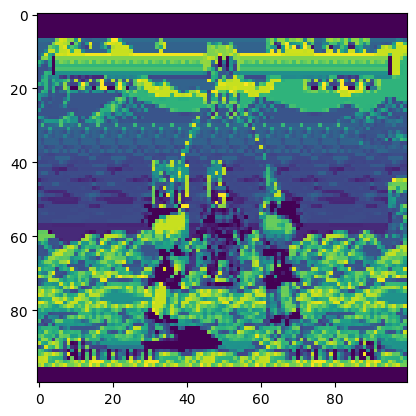

In [150]:
plt.imshow(obs)

In [ ]:
#OPTUNEA OPT
!pip install numpy==1.21

In [ ]:
import numpy
print(numpy.__version__)

In [ ]:
# Import optuna for HPO
import optuna
# Import PPO for algos
from stable_baselines3 import PPO
# Evaluate Policy
from stable_baselines3.common.evaluation import evaluate_policy
# Import wrappers
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
import os

In [ ]:
def optimize_ppo(trial):
    """ Learning hyperparamters we want to optimise"""
    return {
        'n_steps': trial.suggest_int('n_steps', 2048, 8192),
        'gamma': trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range': trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda': trial.suggest_uniform('gae_lambda', 0.8, .99)
    }

In [ ]:
LOG_DIR = './logs/'
OPT_DIR = './opt_nodelta/'

In [ ]:
def optimize_agent(trial):
    try:
        model_params = optimize_ppo(trial)
        env = ArtOfFighting()
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        model.learn(total_timesteps=100000)
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()

        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)
        return mean_reward
    except Exception as e: 
        return -1000

In [ ]:
env.close()
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=10, n_jobs=1)

In [ ]:
study.best_params

In [118]:
# Import os for file path management
import os 
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True
CHECKPOINT_DIR = './samurai/'
callback = TrainAndLoggingCallback(check_freq=500000, save_path=CHECKPOINT_DIR)

In [151]:
from stable_baselines3 import PPO
# Evaluate Policy
from stable_baselines3.common.evaluation import evaluate_policy
# Import wrappers
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack

In [152]:
env.close()
env = ArtOfFighting()
LOG_DIR = './logs/'
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')



In [ ]:
plt.imshow(obs)

In [153]:
model_params = {'n_steps': 4589,
 'gamma': 0.9374097110745698,
 'learning_rate': 5.50335249220798e-05,
 'clip_range': 0.31487950915272284,
 'gae_lambda': 0.9604165799516331}
model_params['n_steps'] = 71*64

In [154]:
model = PPO("CnnPolicy", env, tensorboard_log=LOG_DIR, verbose=0, **model_params)

In [ ]:
timesteps = 100000

In [155]:
timesteps = 500000
model.learn(total_timesteps=timesteps)
#model.learn(total_timesteps=timesteps,callback=callback)

In [ ]:
model.save("PPO_MlpPolicy"+str(timesteps)+"_-reward1")

In [ ]:
model = PPO.load('PPO_4000000_-reward1')

In [ ]:
model = PPO.load("PPO_MlpPolicy"+str(timesteps)+"_-reward1")

In [ ]:
env.close()
env = ArtOfFighting()
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [ ]:
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10, render=False)

In [ ]:
mean_reward

In [ ]:
tensorboard --logdir=./
tensorboard --logdir=Documents\aa_fight\logs
cd Documents\aa_fight\logs

In [ ]:
model._last_obs = None
model.learn(total_timesteps=500000, log_interval=4, reset_num_timesteps=False)

In [156]:
for episode in range(1): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        env.render()
        time.sleep(0.005)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(total_reward, episode))
    time.sleep(2)

c:\Users\isak1\anaconda3\envs\tf-gpu\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Det går inte att ändra trådläget efter att det angetts
  warnings.warn(str(err))


KeyboardInterrupt: 

: 